Name:-**Yusuf-Harun-Shaikh**



**Develop A Neural Network That Can Read Your HandWriting**

In [66]:
import tensorflow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [67]:
mnist = tensorflow.keras.datasets.mnist

In [68]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [69]:
x_train.shape

(60000, 28, 28)

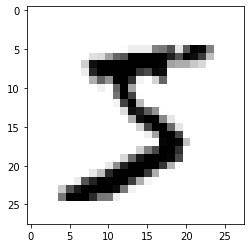

In [70]:
plt.imshow(x_train[0])
plt.show
plt.imshow(x_train[0], cmap= plt.cm.binary)

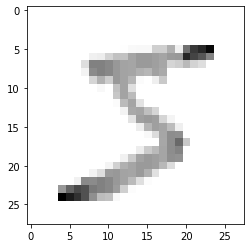

In [71]:
x_train = tensorflow.keras.utils.normalize(x_train, axis=1)
x_test = tensorflow.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [72]:
x_train = np.array(x_train).reshape(-1,28,28,1)
x_test = np.array(x_test).reshape(-1,28,28,1)
print("Train set dimension:", x_train.shape)
print("Test set dimension:", x_test.shape)

Train set dimension: (60000, 28, 28, 1)
Test set dimension: (10000, 28, 28, 1)


In [73]:
model = Sequential()



model.add(Conv2D(64,(3,3), input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
activation_14 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_15 (Activation)   (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)         

In [74]:
len(x_train)

60000

In [75]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [76]:
model.fit(x_train, y_train, epochs=5 , validation_split=0.3, batch_size=1)

Epoch 1/5
42000/42000 [==============================] - 173s 4ms/step - loss: 0.2423 - accuracy: 0.9274 - val_loss: 0.1223 - val_accuracy: 0.9644
Epoch 2/5
42000/42000 [==============================] - 176s 4ms/step - loss: 0.1174 - accuracy: 0.9673 - val_loss: 0.0848 - val_accuracy: 0.9768
Epoch 3/5
42000/42000 [==============================] - 177s 4ms/step - loss: 0.1057 - accuracy: 0.9731 - val_loss: 0.1159 - val_accuracy: 0.9690
Epoch 4/5
42000/42000 [==============================] - 179s 4ms/step - loss: 0.0964 - accuracy: 0.9750 - val_loss: 0.1030 - val_accuracy: 0.9744
Epoch 5/5
42000/42000 [==============================] - 180s 4ms/step - loss: 0.1037 - accuracy: 0.9756 - val_loss: 0.0972 - val_accuracy: 0.9736


In [77]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("The accuracy on samples:", test_acc)
print("The accuracy on samples:", test_loss)

313/313 [==============================] - 3s 10ms/step - loss: 0.0895 - accuracy: 0.9768
The accuracy on samples: 0.9768000245094299
The accuracy on samples: 0.08954580128192902


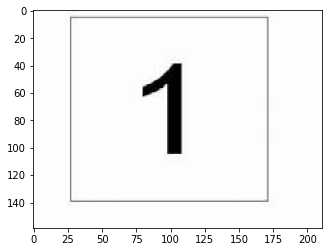

In [87]:
import skimage
import random
from random import randint
img = cv2.imread('1.jpg')
plt.imshow(img)
plt.show()
 

In [88]:
img.shape

(159, 211, 3)

In [89]:
img = cv2.resize((cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)),(28,28), interpolation=cv2.INTER_AREA)

In [90]:
img.shape

(28, 28)

In [91]:
img = tensorflow.keras.utils.normalize(img, axis=1)

In [92]:
img = np.array(img).reshape(-1,28,28,1)

In [93]:
img.shape

(1, 28, 28, 1)

In [94]:
print("Number predicated ==>")
print(np.argmax(model.predict(img)))

Number predicated ==>
1
